# Lab 09 - Task

## 8-Queen Problem using Hill Climbing

The objective of the 8-queens problem is to place eight queens on a chessboard in such a way that no two queens can capture each other, which means no two queens can be on the same row, column, or diagonal. 

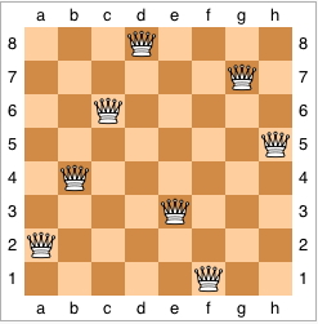 


The first observation is that, in any solution, no two queens can occupy the same column, and consequently no column can be empty. At the start we can therefore assign a column to each queen and reduce the problem to the simpler task of finding an appropriate row.



## Statement of the Problem:

Consider an 8 × 8 chessboard. Place In queens on the board such that no two queens are attacking each other. The queen is the most powerful piece in chess and can attack from any distance horizontally, vertically, or diagonally. Thus, a solution must place the queens such that no two queens are in the same row, the same column, or along the same diagonal.

## Implementation  Steps

1. Create a 2D array to represent the chessboard and initialize it with zeros to represent no queen on the board.


2. Write a function that randomly places a queen in the array by setting the position index to 1.


3. Write a function to calculate the objective function, which is the number of queens attacking each other.


4. Write a function to search for the solution using the hill climbing algorithm.

        a. Initializing the starting solution by randomly placing queens on the board.

        b. Evaluating the objective function for the starting solution.

        c. Generating a set of candidate solutions by applying some neighborhood functions to the current solution.

        d. Evaluating the objective function for each candidate solution.

        e. Choosing the best candidate solution as the new current solution.

        f. Continuing this process until a stopping criterion is met.


5. Return the best solution found during the search, which represents a placement of 8 queens on the chessboard such that no queen attacks another.

### Note:
The heuristic cost function “h” is the number of pairs of queens that are attacking each other, either directly or indirectly.
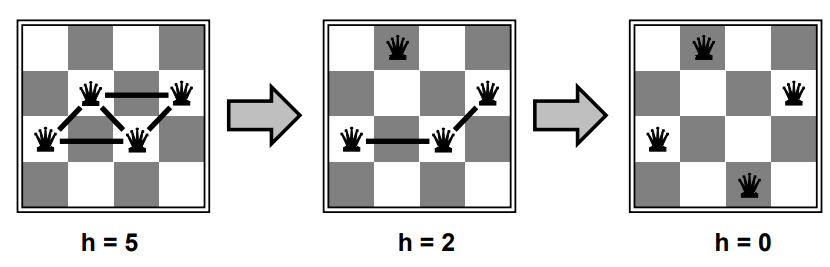

## Hill Climbing 

* Start with a random configuration.

* Calculate h(board) as the number of pairs of attacking queens.

* Consider all 56 (for N = 8) possible next boards formed by moving any one queen to any other row in its column.

* Evaluate h(board) for each of these possibilities.

*  If none is better than the current h, quit (local min). Else, take the best as the new current board and repeat. 

This will fail 86% of the time for N = 8.


### Task Solution

## 1. Create a 2D array to represent the chessboard and initialize it with zeros to represent no queen on the board.

In [1]:
import numpy as np
import random
from random import randint

In [2]:
def generate_board():
    board = [[0 for j in range(8)] for i in range(8)]
    queens = [(i, random.randint(0, 7)) for i in range(8)]
    for i, (r, c) in enumerate(queens):
        board[r][c] = 1
    return board

In [3]:
chessboard = generate_board()

In [4]:
chessboard

[[0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0]]

## 2. Write a function that randomly places a queen in the array by setting the position index to 1.

In [5]:
def place_queen(board):
    """Randomly places a queen on the board by setting the position index to 1."""
    row = random.randint(0, 7)
    col = random.randint(0, 7)
    board[row][col] = 1

In [6]:
place_queen(chessboard)

In [7]:
chessboard

[[0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0]]

## 3. Write a function to calculate the objective function, which is the number of queens attacking each other.


In [8]:
def objective_function(board):
    h = 0
    for i in range(8):
        for j in range(8):
            if board[i][j] == 1:
                # Check row and column h
                for k in range(8):
                    if k != j and board[i][k] == 1:
                        h += 1
                    if k != i and board[k][j] == 1:
                        h += 1
                # Check diagonal h
                for k in range(1, 8):
                    if i-k >= 0 and j-k >= 0 and board[i-k][j-k] == 1:
                        h += 1
                    if i-k >= 0 and j+k < 8 and board[i-k][j+k] == 1:
                        h += 1
                    if i+k < 8 and j-k >= 0 and board[i+k][j-k] == 1:
                        h += 1
                    if i+k < 8 and j+k < 8 and board[i+k][j+k] == 1:
                        h += 1
    return h


In [9]:
objective_function(chessboard)

28

## 4. Write a function to search for the solution using the hill climbing algorithm.

        a. Initializing the starting solution by randomly placing queens on the board.

        b. Evaluating the objective function for the starting solution.

        c. Generating a set of candidate solutions by applying some neighborhood functions to the current solution.

        d. Evaluating the objective function for each candidate solution.

        e. Choosing the best candidate solution as the new current solution.

        f. Continuing this process until a stopping criterion is met.


In [10]:
import random

def hill_climbing(max_iterations=100):
    board = generate_board()
    for i in range(max_iterations):
        conflicts = objective_function(board)
        if conflicts == 0:
            return board
        # Generate a set of candidate solutions
        candidates = []
        for r, c in [(i, j) for i in range(8) for j in range(8) if board[i][j] == 1]:
            for nc in range(8):
                if nc != c:
                    candidate = [[0 for j in range(8)] for i in range(8)]
                    for qi, qj in [(i, j) for i in range(8) for j in range(8) if board[i][j] == 1]:
                        candidate[qi][qj] = 1
                    candidate[r][nc] = 1
                    candidates.append(candidate)
        # Evaluate the objective function for each candidate solution
        candidate_scores = [objective_function(c) for c in candidates]
        # Choose the best candidate solution as the new current solution
        best_score = min(candidate_scores)
        if best_score >= conflicts:
            return board
        best_candidates = [candidates[i] for i in range(len(candidates)) if candidate_scores[i] == best_score]
        board = random.choice(best_candidates)
    return board


In [11]:
solution = hill_climbing()
solution

[[0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0]]

In [12]:
objective_function(solution)

10

# Final Code of Hill Climbing Using Classes

In [13]:
import numpy as np
import random


class Board:
    def __init__(self, queens):
        self.board = [[0 for j in range(8)] for i in range(8)]
        self.queens = queens
        for i, (r, c) in enumerate(queens):
            self.board[r][c] = 1
            
    def __str__(self):
        s = ''
        for i in range(8):
            for j in range(8):
                if self.board[i][j] == 1:
                    s += 'Q '
                else:
                    s += '. '
            s += '\n'
        return s

    def place_queen(self, row, col):
        """Place a queen on the board by setting the position index to 1."""
        self.board[row][col] = 1

    def remove_queen(self, row, col):
        """Remove a queen from the board by setting the position index to 0."""
        self.board[row][col] = 0

    def objective_function(self):
        h = 0
        for i in range(8):
            for j in range(8):
                if self.board[i][j] == 1:
                    # Check row and column h
                    for k in range(8):
                        if k != j and self.board[i][k] == 1:
                            h += 1
                        if k != i and self.board[k][j] == 1:
                            h += 1
                    # Check diagonal h
                    for k in range(1, 8):
                        if i - k >= 0 and j - k >= 0 and self.board[i - k][j - k] == 1:
                            h += 1
                        if i - k >= 0 and j + k < 8 and self.board[i - k][j + k] == 1:
                            h += 1
                        if i + k < 8 and j - k >= 0 and self.board[i + k][j - k] == 1:
                            h += 1
                        if i + k < 8 and j + k < 8 and self.board[i + k][j + k] == 1:
                            h += 1
        return h


class HillClimbing:
    def __init__(self, max_iterations=100):
        self.max_iterations = max_iterations

    def generate_board(self):
        queens = [(i, random.randint(0, 7)) for i in range(8)]
        return Board(queens)

    def hill_climbing(self):
        board = self.generate_board()
        for i in range(self.max_iterations):
            conflicts = board.objective_function()
            if conflicts == 0:
                return board
            # Generate a set of candidate solutions
            candidates = []
            for r, c in [(i, j) for i in range(8) for j in range(8) if board.board[i][j] == 1]:
                for nc in range(8):
                    if nc != c:
                        candidate = Board([(i, j) for i, j in enumerate(board.board[r])])
                        candidate.remove_queen(r, c)
                        candidate.place_queen(r, nc)
                        candidates.append(candidate)
            # Evaluate the objective function for each candidate solution
            candidate_scores = [c.objective_function() for c in candidates]
            # Choose the best candidate solution as the new current solution
            best_score = min(candidate_scores)
            if best_score >= conflicts:
                return board
            best_candidates = [candidates[i] for i in range(len(candidates)) if candidate_scores[i] == best_score]
            board = random.choice(best_candidates)
        return board



if __name__ == "__main__":
    hc = HillClimbing()
    solution = hc.hill_climbing()
    print(solution)

. . . . . Q . . 
. . . . Q . . . 
. . . . . Q . . 
. Q . . . . . . 
. . . . . . . Q 
Q . . . . . . . 
. . Q . . . . . 
. . . . Q . . . 



# 8-Queen Problem using Simulated Annealing

In [14]:
import numpy as np
import random
import math

class SimulatedAnnealing:
    def __init__(self, max_iterations=1000, start_temperature=100.0, min_temperature=0.001, alpha=0.99):
        self.max_iterations = max_iterations
        self.start_temperature = start_temperature
        self.min_temperature = min_temperature
        self.alpha = alpha

    def generate_board(self):
        queens = [(i, random.randint(0, 7)) for i in range(8)]
        return Board(queens)

    def acceptance_probability(self, old_score, new_score, temperature):
        if new_score < old_score:
            return 1.0
        else:
            return math.exp((old_score - new_score) / temperature)

    def simulated_annealing(self):
        board = self.generate_board()
        temperature = self.start_temperature
        for i in range(self.max_iterations):
            conflicts = board.objective_function()
            if conflicts == 0:
                return board
            # Generate a candidate solution
            r, c = random.choice([(i, j) for i in range(8) for j in range(8)])
            nc = random.randint(0, 7)
            candidate = Board([(i, j) for i, j in board.queens])
            candidate.remove_queen(r, c)
            candidate.place_queen(r, nc)
            # Calculate the objective function of the candidate solution
            candidate_score = candidate.objective_function()
            # Calculate acceptance probability
            ap = self.acceptance_probability(conflicts, candidate_score, temperature)
            # Accept or reject the candidate solution
            if ap > random.random():
                board = candidate
            # Decrease the temperature
            temperature *= self.alpha
            if temperature < self.min_temperature:
                return board
        return board


In [15]:
sa = SimulatedAnnealing()
solution = sa.simulated_annealing()
print(solution)

. Q . . . . . . 
. . . . . . Q . 
. . . . Q . . . 
. Q . . . . . . 
. . . . Q . . . 
Q . . . . . . . 
. . . . . . . Q 
. . . Q . . . . 

